01 -  Importação das bibliotecas e base de dados

In [317]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [318]:
dataset = pd.read_csv('./datasets/HRDataset_v14.csv')

In [319]:
dataset.shape

(311, 36)

In [320]:
dataset.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


02 - Tratamento de dados para melhor entendimento

In [321]:
dataset.columns = ['Nome', 'ID', 'CASADO', 'ESTADO_CIVIL', 'GENERO', 'STATUS_EMPREGO', 'DEPARTAMENTOID', 'PONTUACAO_DESEMPENHO', 'DIVERSIDADE', 'SALARIO', 'DEMITIDO', 'POSICAO', 'NAME_POSICAO', 'ESTADO_RESIDE', 'CODIGO_POSTAL', 'DATA_NASCIMENTO', 'SEXO', 'ESTADO__CIVIL', 'ROTULO_CIDADAO', 'HISPANICO/LATINO', 'RACA', 'DATA_CONTATACAO', 'RESCINDIDA', 'MOTIVO_REENCIDIDA', 'SITUACAO_PROFISSIONAL', 'DEPARTAMENTO', 'GERENTE_PESSOA', 'ID_GERENTE', 'FONTE_RECRUTAMENTO', 'PONTUACAO_PERFORMACE', 'ENGAJAMENTO', 'PONTUACAO_SATISFACAO', 'N_PROJETOS', 'DATA_DESEMPENHO', 'N_ATRASOS', 'N_AUSENTE']

In [322]:
dataset['DATA_NASCIMENTO'][16]

'04/17/66'

In [323]:
from datetime import datetime, date
today = date.today()
i=0
for data in dataset['DATA_NASCIMENTO']:
    born = datetime.strptime(data, '%m/%d/%y')
    if born.year > 2000:
        born = born.year
        born-=100
        print(born)
    else: born = born.year
    dataset['DATA_NASCIMENTO'][i] = today.year - born
    i=i+1
dataset['DATA_NASCIMENTO']

1966
1958
1967
1964
1964
1966
1963
1951
1965
1952
1951
1967
1955
1963
1968
1964
1952
1966
1966
1964
1959
1954
1968
1967
1952
1961
1954
1964
1968
1963
1965
1968
1968
1953
1965
1965
1967
1968
1968
1955
1965
1958


/tmp/ipykernel_56341/2495098409.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['DATA_NASCIMENTO'][i] = today.year - born


0      40
1      48
2      35
3      35
4      34
       ..
306    38
307    41
308    44
309    44
310    45
Name: DATA_NASCIMENTO, Length: 311, dtype: object

In [324]:
dataset['DATA_NASCIMENTO'][16]

57

In [325]:
dataset['DATA_NASCIMENTO'] = dataset['DATA_NASCIMENTO'].astype(int)

In [326]:
dataset['DATA_NASCIMENTO'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 311 entries, 0 to 310
Series name: DATA_NASCIMENTO
Non-Null Count  Dtype
--------------  -----
311 non-null    int64
dtypes: int64(1)
memory usage: 2.6 KB


In [327]:
dataset.columns

Index(['Nome', 'ID', 'CASADO', 'ESTADO_CIVIL', 'GENERO', 'STATUS_EMPREGO',
       'DEPARTAMENTOID', 'PONTUACAO_DESEMPENHO', 'DIVERSIDADE', 'SALARIO',
       'DEMITIDO', 'POSICAO', 'NAME_POSICAO', 'ESTADO_RESIDE', 'CODIGO_POSTAL',
       'DATA_NASCIMENTO', 'SEXO', 'ESTADO__CIVIL', 'ROTULO_CIDADAO',
       'HISPANICO/LATINO', 'RACA', 'DATA_CONTATACAO', 'RESCINDIDA',
       'MOTIVO_REENCIDIDA', 'SITUACAO_PROFISSIONAL', 'DEPARTAMENTO',
       'GERENTE_PESSOA', 'ID_GERENTE', 'FONTE_RECRUTAMENTO',
       'PONTUACAO_PERFORMACE', 'ENGAJAMENTO', 'PONTUACAO_SATISFACAO',
       'N_PROJETOS', 'DATA_DESEMPENHO', 'N_ATRASOS', 'N_AUSENTE'],
      dtype='object')

In [328]:
dataset.describe()

,ID,CASADO,ESTADO_CIVIL,GENERO,STATUS_EMPREGO,DEPARTAMENTOID,PONTUACAO_DESEMPENHO,DIVERSIDADE,SALARIO,DEMITIDO,POSICAO,CODIGO_POSTAL,DATA_NASCIMENTO,ID_GERENTE,ENGAJAMENTO,PONTUACAO_SATISFACAO,N_PROJETOS,N_ATRASOS,N_AUSENTE
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,44.408360,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.870236,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,31.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,37.000000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,43.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,50.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,72.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


03 - Visualização dos dados

In [329]:
dataset.head()

,Nome,ID,CASADO,ESTADO_CIVIL,GENERO,STATUS_EMPREGO,DEPARTAMENTOID,PONTUACAO_DESEMPENHO,DIVERSIDADE,SALARIO,...,GERENTE_PESSOA,ID_GERENTE,FONTE_RECRUTAMENTO,PONTUACAO_PERFORMACE,ENGAJAMENTO,PONTUACAO_SATISFACAO,N_PROJETOS,DATA_DESEMPENHO,N_ATRASOS,N_AUSENTE
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [330]:
dataset.isnull().sum().sort_values(ascending=True)

Nome                       0
DATA_DESEMPENHO            0
N_PROJETOS                 0
PONTUACAO_SATISFACAO       0
ENGAJAMENTO                0
PONTUACAO_PERFORMACE       0
FONTE_RECRUTAMENTO         0
GERENTE_PESSOA             0
DEPARTAMENTO               0
SITUACAO_PROFISSIONAL      0
MOTIVO_REENCIDIDA          0
DATA_CONTATACAO            0
RACA                       0
HISPANICO/LATINO           0
ROTULO_CIDADAO             0
N_ATRASOS                  0
ESTADO__CIVIL              0
DATA_NASCIMENTO            0
ID                         0
CASADO                     0
ESTADO_CIVIL               0
GENERO                     0
STATUS_EMPREGO             0
DEPARTAMENTOID             0
SEXO                       0
PONTUACAO_DESEMPENHO       0
SALARIO                    0
DEMITIDO                   0
POSICAO                    0
NAME_POSICAO               0
ESTADO_RESIDE              0
CODIGO_POSTAL              0
DIVERSIDADE                0
N_AUSENTE                  0
ID_GERENTE    

<AxesSubplot:>

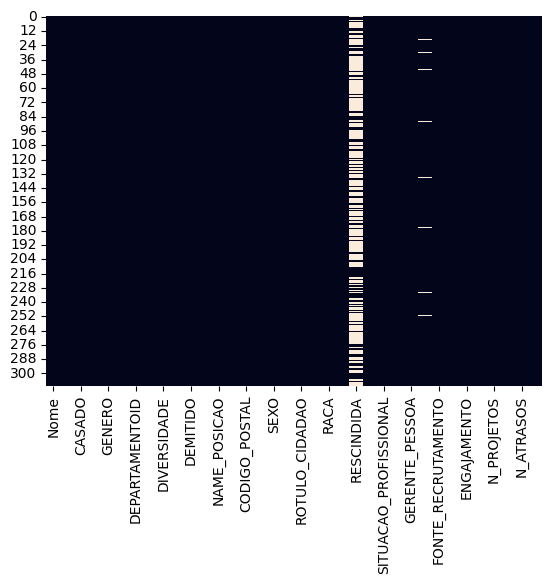

In [331]:
sns.heatmap(dataset.isnull(), cbar = False)

In [332]:
dataset.drop(['RESCINDIDA'], axis = 1, inplace=True)

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'CASADO'}>,
        <AxesSubplot:title={'center':'ESTADO_CIVIL'}>,
        <AxesSubplot:title={'center':'GENERO'}>],
       [<AxesSubplot:title={'center':'STATUS_EMPREGO'}>,
        <AxesSubplot:title={'center':'DEPARTAMENTOID'}>,
        <AxesSubplot:title={'center':'PONTUACAO_DESEMPENHO'}>,
        <AxesSubplot:title={'center':'DIVERSIDADE'}>],
       [<AxesSubplot:title={'center':'SALARIO'}>,
        <AxesSubplot:title={'center':'DEMITIDO'}>,
        <AxesSubplot:title={'center':'POSICAO'}>,
        <AxesSubplot:title={'center':'CODIGO_POSTAL'}>],
       [<AxesSubplot:title={'center':'DATA_NASCIMENTO'}>,
        <AxesSubplot:title={'center':'ID_GERENTE'}>,
        <AxesSubplot:title={'center':'ENGAJAMENTO'}>,
        <AxesSubplot:title={'center':'PONTUACAO_SATISFACAO'}>],
       [<AxesSubplot:title={'center':'N_PROJETOS'}>,
        <AxesSubplot:title={'center':'N_ATRASOS'}>,
        <AxesSubplot:title=

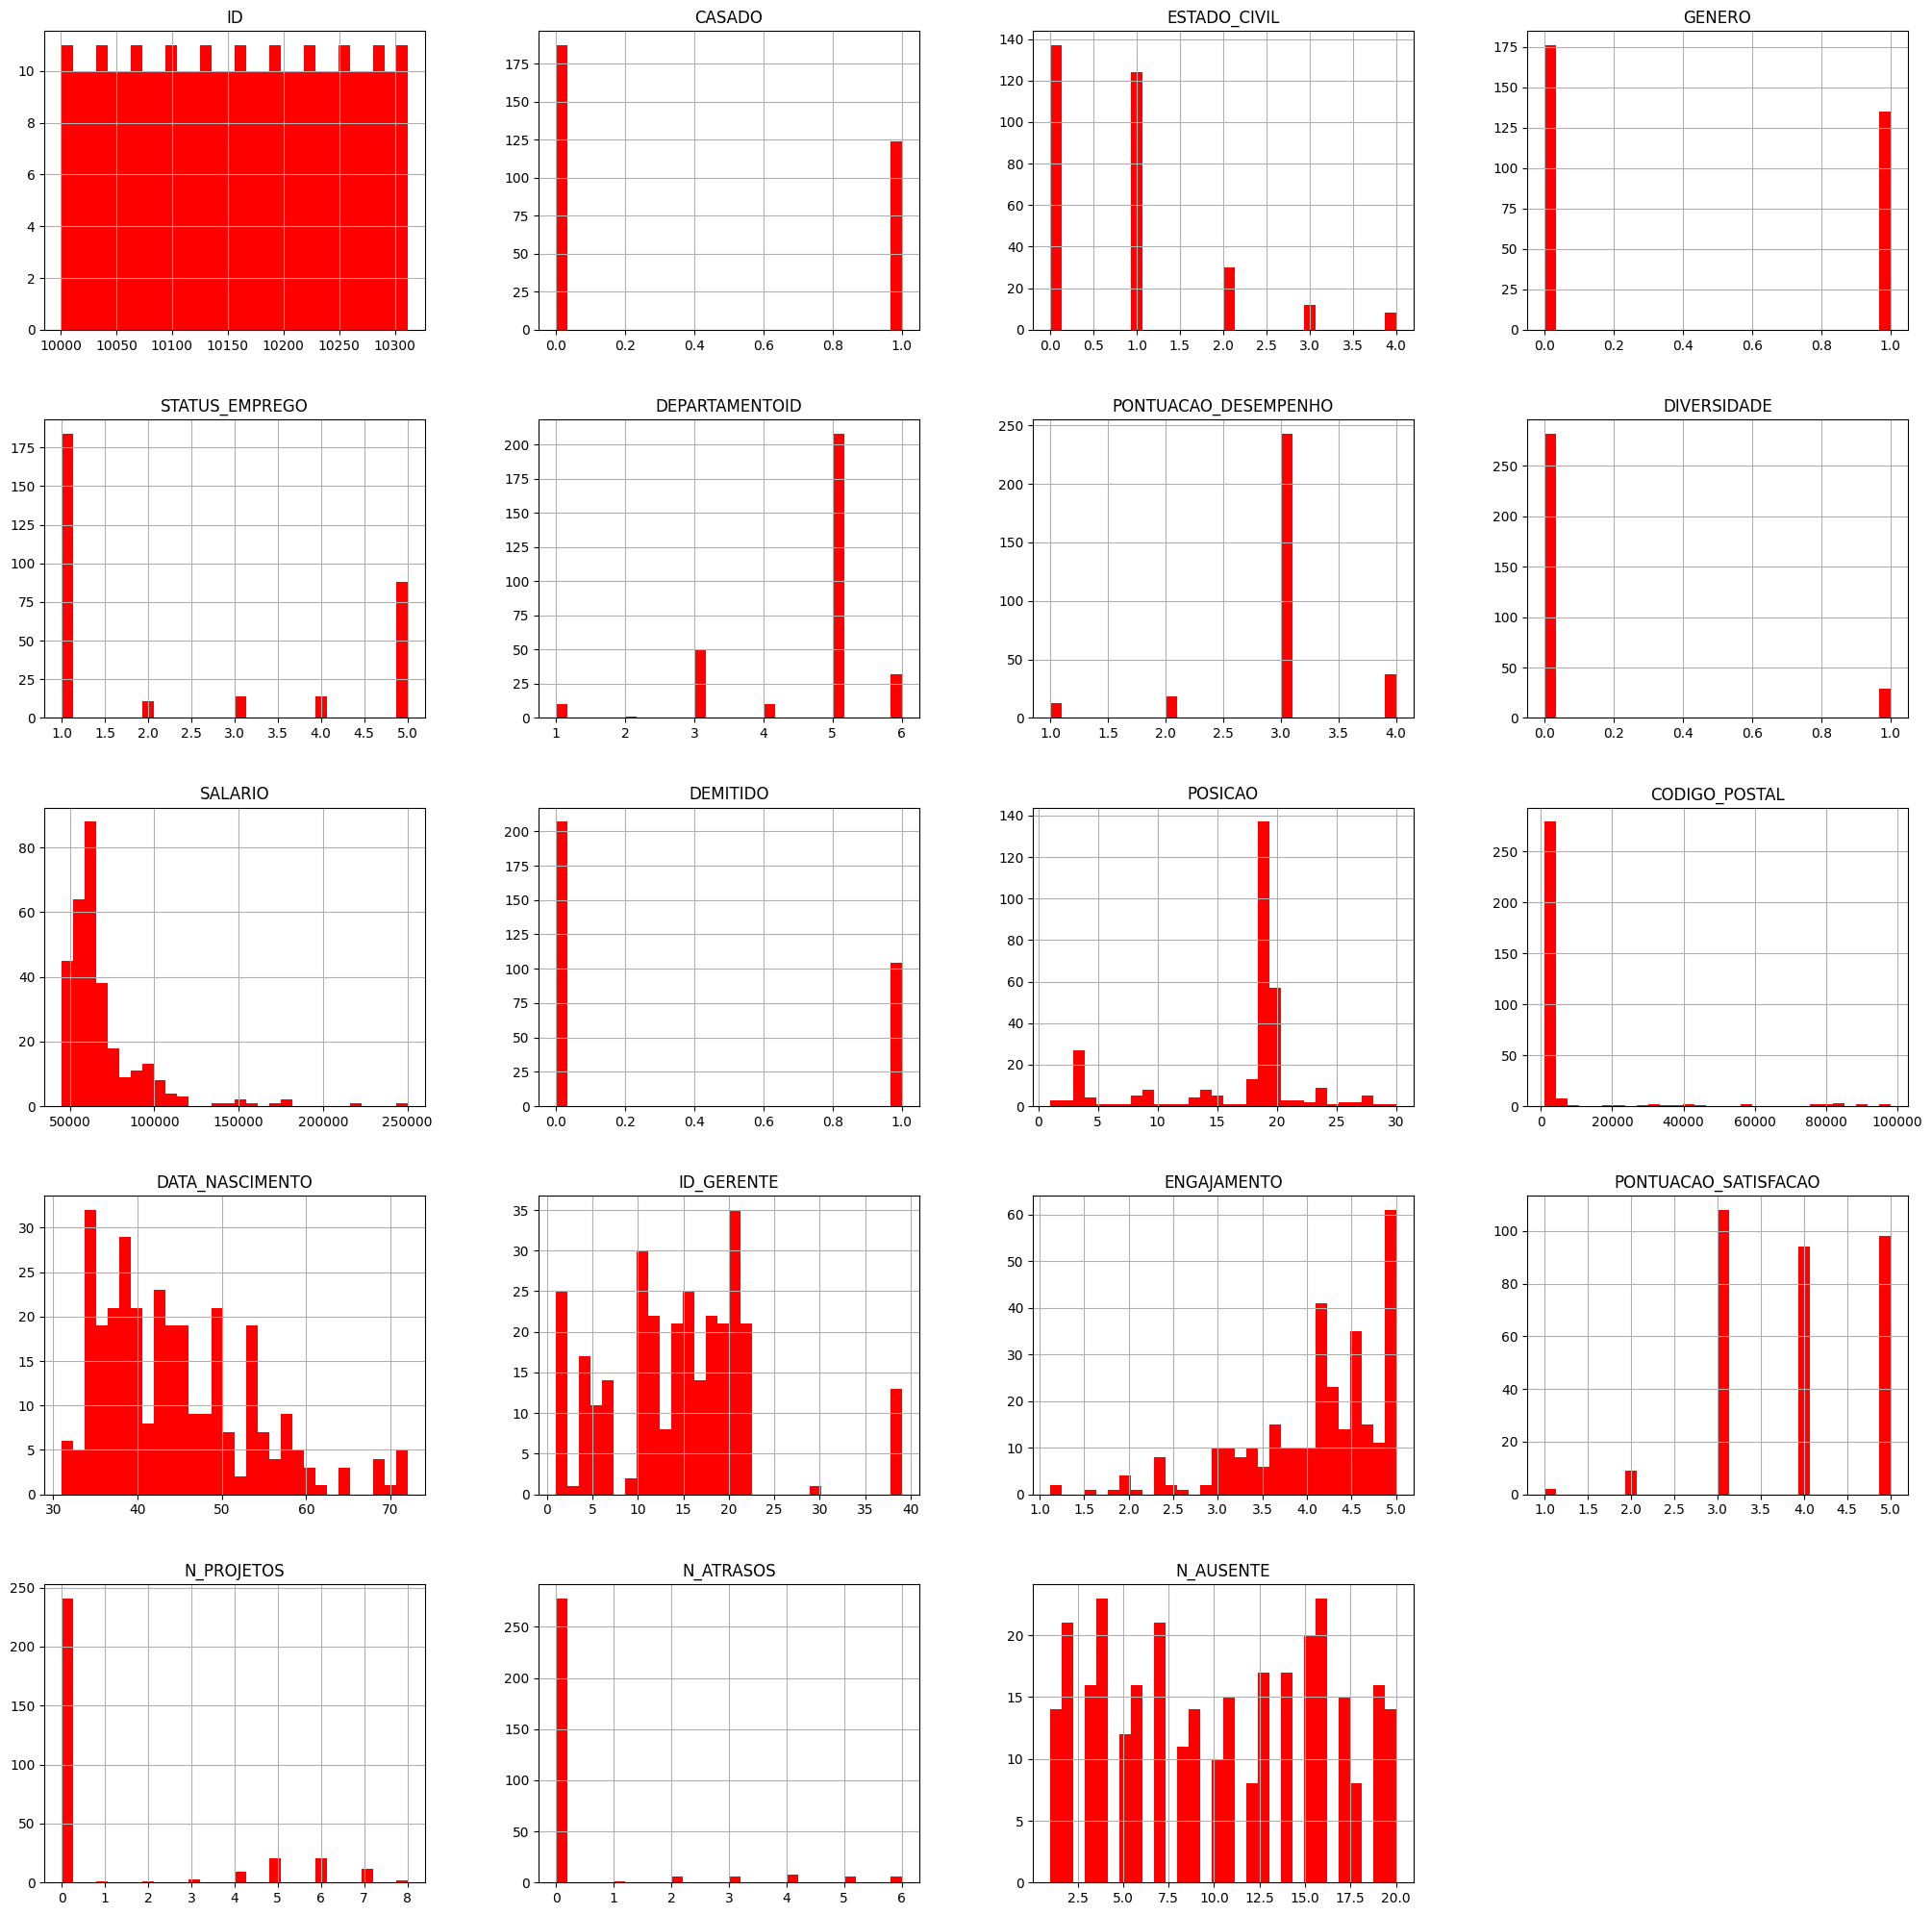

In [333]:
dataset.hist(bins=30, figsize=(25,25), color ='r')

In [334]:
left_df = dataset[dataset['DEMITIDO'] == 1]
stayed_df = dataset[dataset['DEMITIDO'] == 0]

In [335]:
print("Total = ", len(dataset))
print("Número de funcionários que saíram da empresa = ", len(left_df))
print("Porcentagem de funcionários que saíram da empresa = ", (len(left_df) / len(dataset)) * 100)
print('Número de pessoa que permeceram na empresa = ', len(stayed_df))
print('Porcentagem de funcionários que ficaram na empresa = ', (len(stayed_df) / len(dataset)) * 100)

Total =  311
Número de funcionários que saíram da empresa =  104
Porcentagem de funcionários que saíram da empresa =  33.440514469453376
Número de pessoa que permeceram na empresa =  207
Porcentagem de funcionários que ficaram na empresa =  66.55948553054662


In [336]:
left_df.describe()

,ID,CASADO,ESTADO_CIVIL,GENERO,STATUS_EMPREGO,DEPARTAMENTOID,PONTUACAO_DESEMPENHO,DIVERSIDADE,SALARIO,DEMITIDO,POSICAO,CODIGO_POSTAL,DATA_NASCIMENTO,ID_GERENTE,ENGAJAMENTO,PONTUACAO_SATISFACAO,N_PROJETOS,N_ATRASOS,N_AUSENTE
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.0,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,10167.701923,0.451923,0.942308,0.423077,4.788462,4.711538,2.903846,0.153846,65690.076923,1.0,18.134615,3244.894231,45.682692,16.903846,4.090481,3.884615,0.730769,0.663462,11.048077
std,89.400146,0.500093,0.943315,0.496440,0.633576,0.920881,0.566358,0.362548,18679.799457,0.0,4.975782,5814.112301,9.714632,10.380638,0.810150,0.862461,1.849853,1.646477,5.808230
min,10004.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45115.000000,1.0,2.000000,1420.000000,32.000000,1.000000,2.000000,2.000000,0.000000,0.000000,1.000000
25%,10090.750000,0.000000,0.000000,0.000000,5.000000,5.000000,3.000000,0.000000,53546.000000,1.0,19.000000,1901.750000,38.000000,11.000000,3.585000,3.000000,0.000000,0.000000,6.000000
50%,10170.500000,0.000000,1.000000,0.000000,5.000000,5.000000,3.000000,0.000000,60547.000000,1.0,19.000000,2133.500000,44.000000,16.000000,4.220000,4.000000,0.000000,0.000000,11.000000
75%,10249.750000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,70267.000000,1.0,20.000000,2374.500000,51.000000,20.000000,4.715000,5.000000,0.000000,0.000000,16.000000
max,10305.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,148999.000000,1.0,30.000000,43050.000000,72.000000,39.000000,5.000000,5.000000,7.000000,6.000000,20.000000


In [337]:
stayed_df.describe()

,ID,CASADO,ESTADO_CIVIL,GENERO,STATUS_EMPREGO,DEPARTAMENTOID,PONTUACAO_DESEMPENHO,DIVERSIDADE,SALARIO,DEMITIDO,POSICAO,CODIGO_POSTAL,DATA_NASCIMENTO,ID_GERENTE,ENGAJAMENTO,PONTUACAO_SATISFACAO,N_PROJETOS,N_ATRASOS,N_AUSENTE
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.0,207.000000,207.000000,207.000000,199.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,10150.120773,0.371981,0.743961,0.439614,1.188406,4.560386,3.014493,0.062802,70694.033816,0.0,16.198068,8218.772947,43.768116,13.351759,4.119807,3.893720,1.463768,0.289855,9.830918
std,89.823127,0.484505,0.938471,0.497543,0.538120,1.155391,0.595112,0.243195,27739.416425,0.0,6.681695,20124.948327,8.365692,6.255251,0.781390,0.933887,2.532774,1.058045,5.846367
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.0,1.000000,1013.000000,31.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10075.000000,0.000000,0.000000,0.000000,1.000000,4.000000,3.000000,0.000000,56593.000000,0.0,14.000000,1896.000000,37.000000,8.000000,3.730000,3.000000,0.000000,0.000000,4.000000
50%,10150.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,63051.000000,0.0,19.000000,2132.000000,42.000000,14.000000,4.290000,4.000000,0.000000,0.000000,10.000000
75%,10225.500000,1.000000,1.000000,1.000000,1.000000,5.000000,3.000000,0.000000,72816.000000,0.0,19.500000,2351.000000,49.000000,19.000000,4.670000,5.000000,3.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,3.000000,6.000000,4.000000,1.000000,250000.000000,0.0,28.000000,98052.000000,72.000000,22.000000,5.000000,5.000000,8.000000,6.000000,20.000000


<AxesSubplot:>

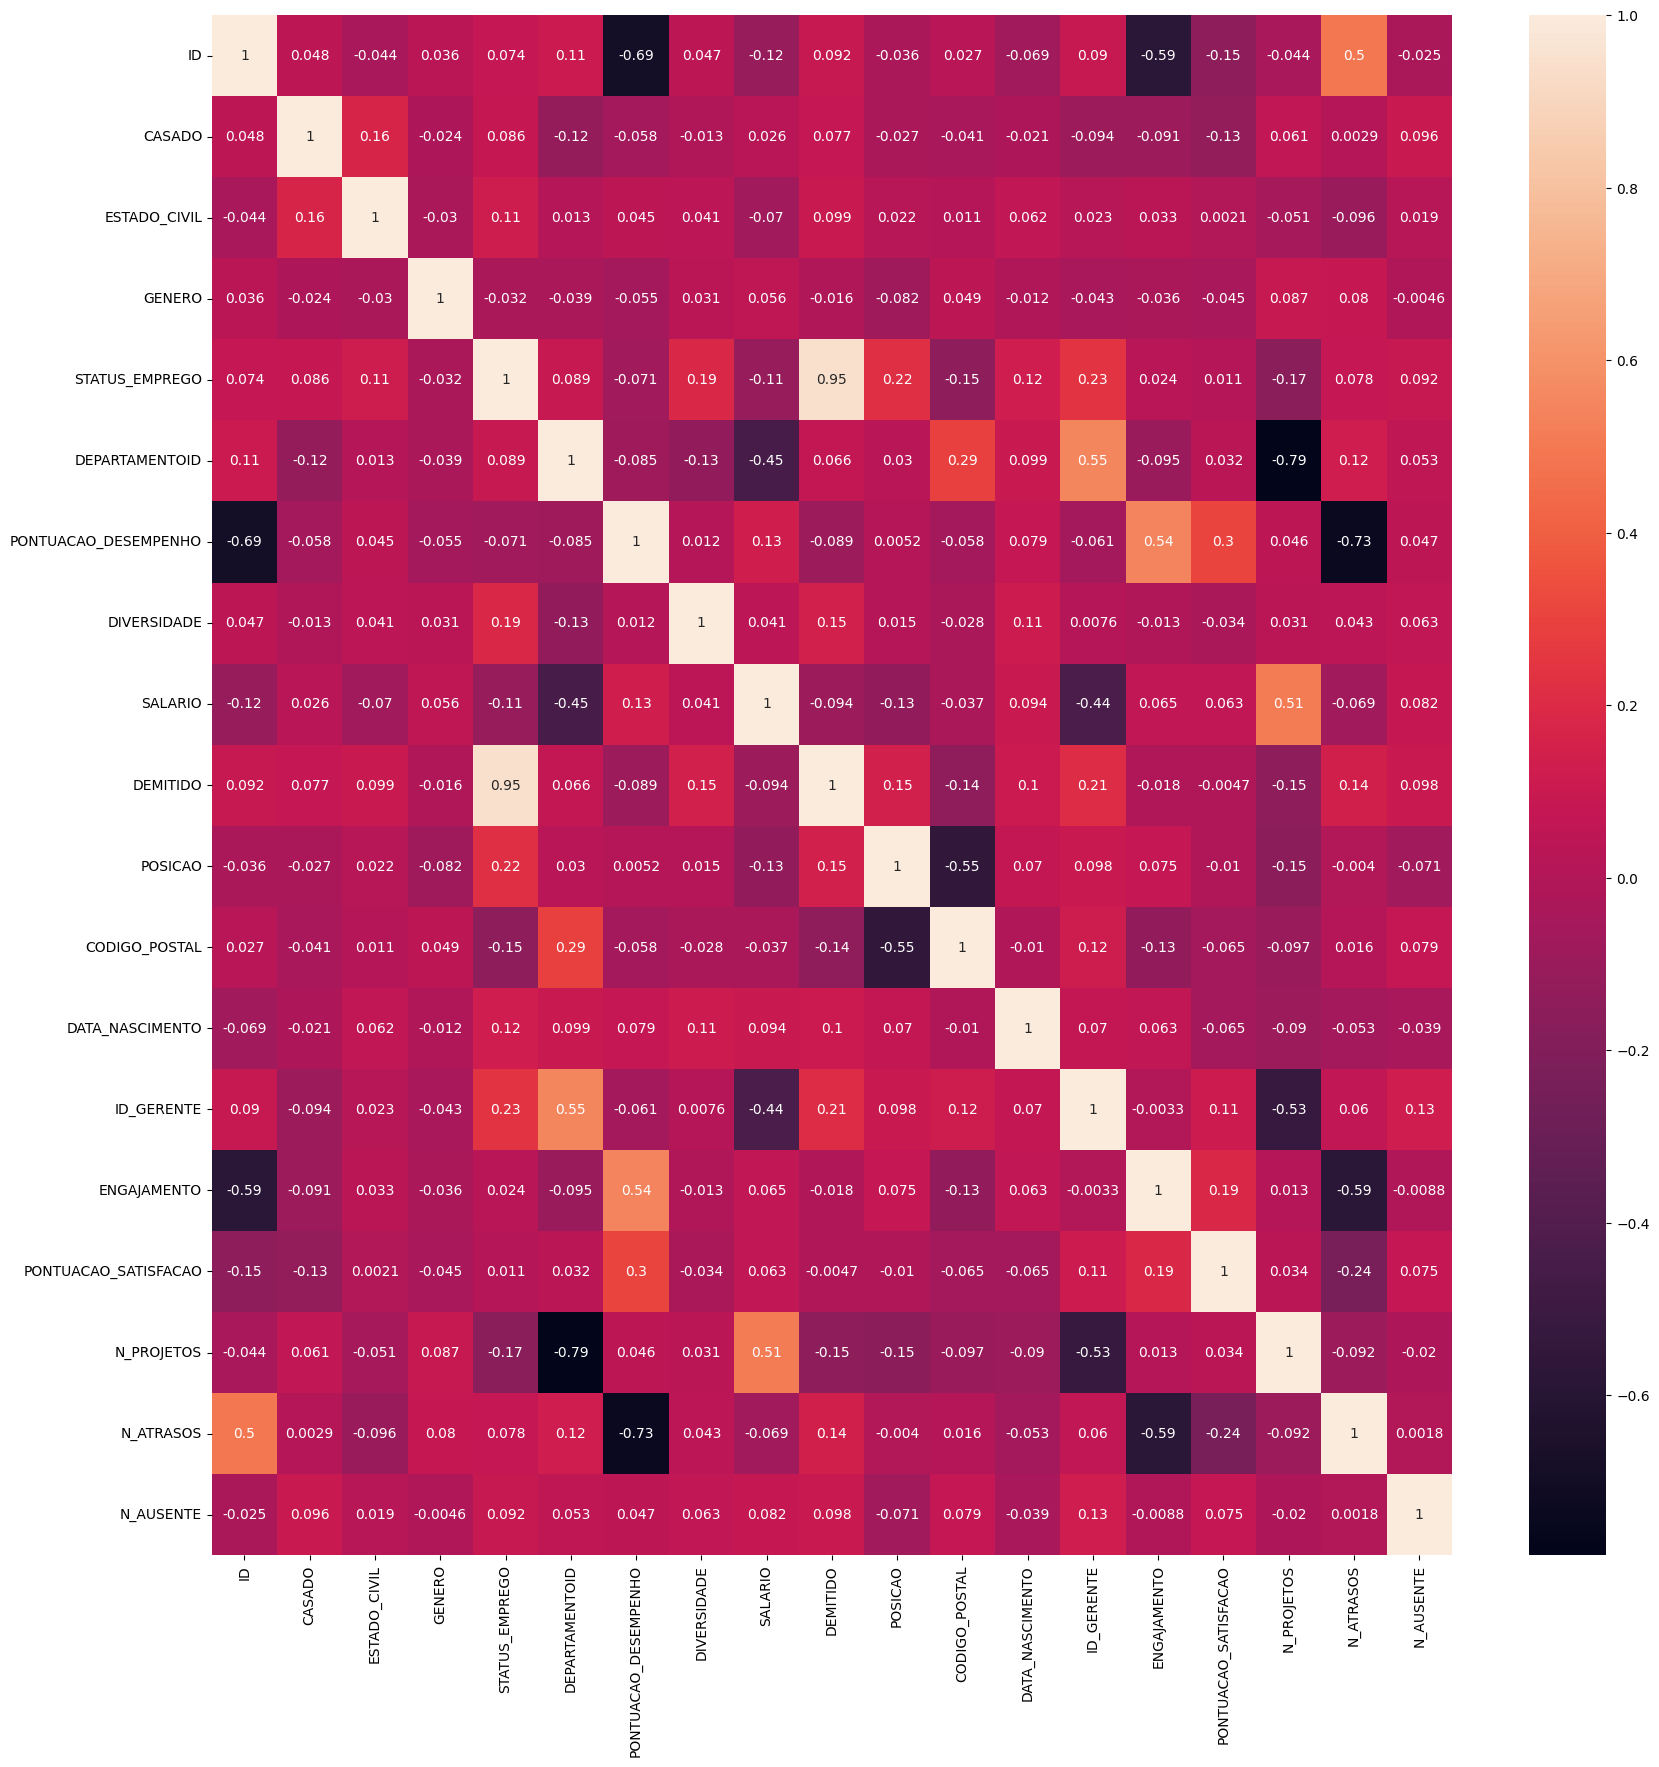

In [338]:
correlations = dataset.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot = True)

<AxesSubplot:xlabel='SALARIO', ylabel='SEXO'>

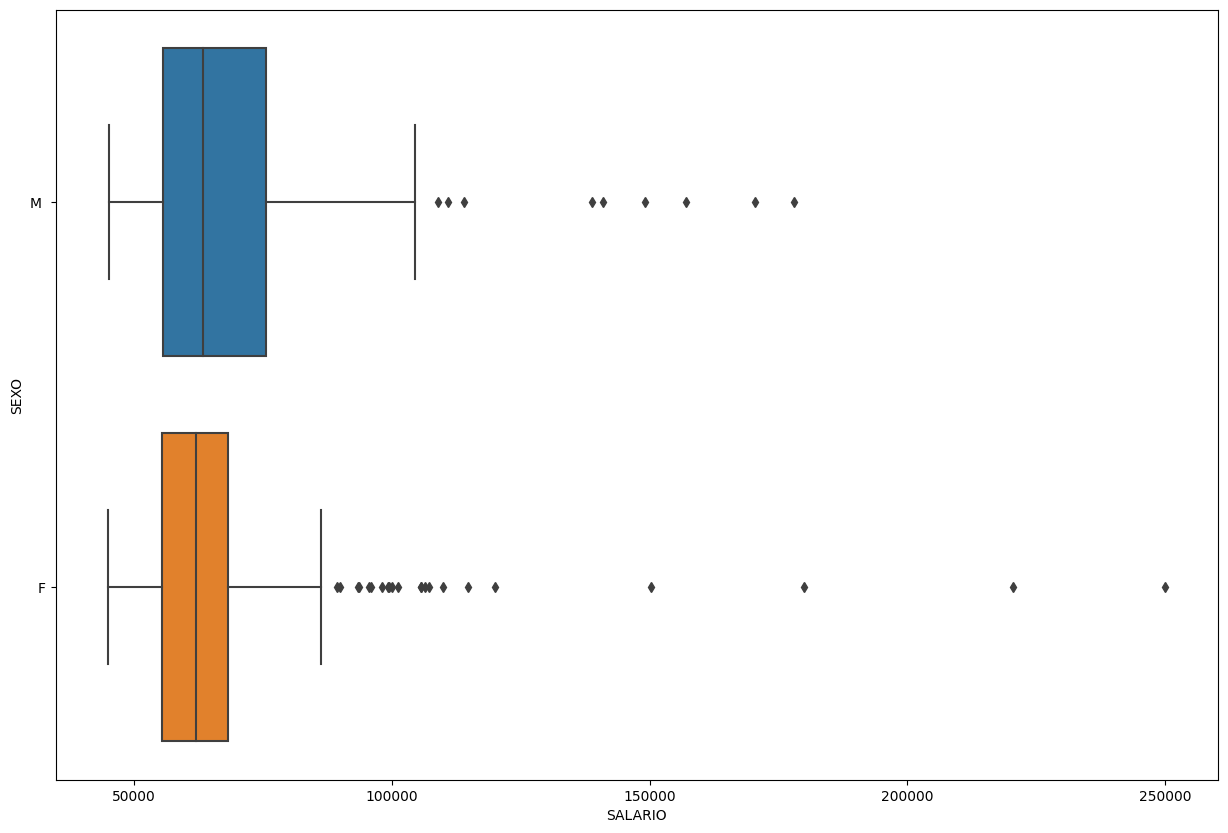

In [339]:
plt.figure(figsize=[15,10])
sns.boxplot(x = 'SALARIO', y= 'SEXO', data=dataset)

In [340]:
dataset['NAME_POSICAO']

0       Production Technician I
1                       Sr. DBA
2      Production Technician II
3       Production Technician I
4       Production Technician I
                 ...           
306    Production Technician II
307     Production Technician I
308                         CIO
309                Data Analyst
310     Production Technician I
Name: NAME_POSICAO, Length: 311, dtype: object

<AxesSubplot:xlabel='SALARIO', ylabel='NAME_POSICAO'>

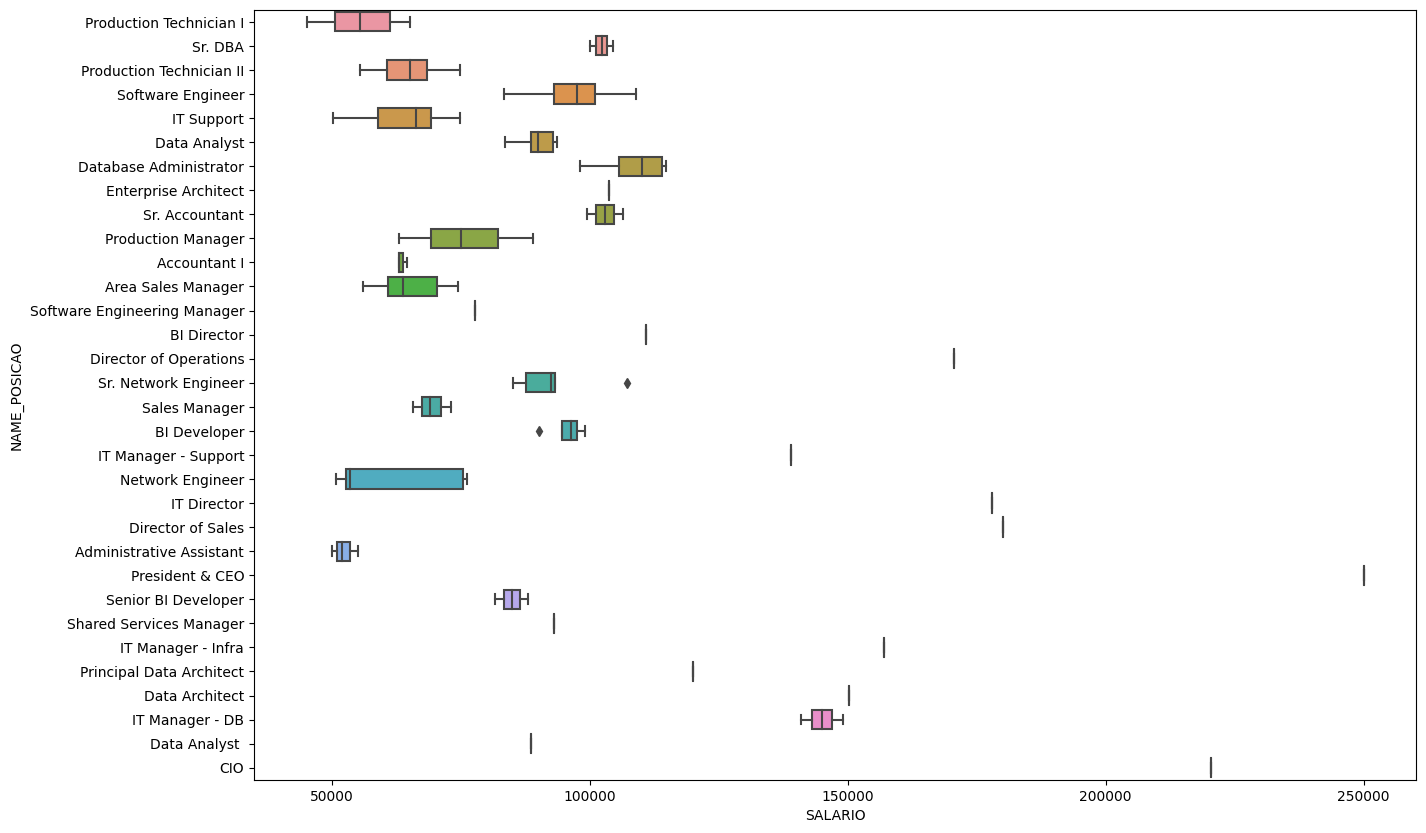

In [341]:
plt.figure(figsize=[15,10])
sns.boxplot(x = 'SALARIO', y= 'NAME_POSICAO', data=dataset)

# 04 -  Pré-Processamento e bases de treinamento/teste

In [342]:
dataset.columns

Index(['Nome', 'ID', 'CASADO', 'ESTADO_CIVIL', 'GENERO', 'STATUS_EMPREGO',
       'DEPARTAMENTOID', 'PONTUACAO_DESEMPENHO', 'DIVERSIDADE', 'SALARIO',
       'DEMITIDO', 'POSICAO', 'NAME_POSICAO', 'ESTADO_RESIDE', 'CODIGO_POSTAL',
       'DATA_NASCIMENTO', 'SEXO', 'ESTADO__CIVIL', 'ROTULO_CIDADAO',
       'HISPANICO/LATINO', 'RACA', 'DATA_CONTATACAO', 'MOTIVO_REENCIDIDA',
       'SITUACAO_PROFISSIONAL', 'DEPARTAMENTO', 'GERENTE_PESSOA', 'ID_GERENTE',
       'FONTE_RECRUTAMENTO', 'PONTUACAO_PERFORMACE', 'ENGAJAMENTO',
       'PONTUACAO_SATISFACAO', 'N_PROJETOS', 'DATA_DESEMPENHO', 'N_ATRASOS',
       'N_AUSENTE'],
      dtype='object')

In [379]:
X_cat = dataset[['NAME_POSICAO', 'ESTADO_RESIDE', 'RACA', 'SITUACAO_PROFISSIONAL', 'DEPARTAMENTO', 'FONTE_RECRUTAMENTO', 'PONTUACAO_PERFORMACE',
       'HISPANICO/LATINO', 'SEXO', 'GERENTE_PESSOA']]
X_cat

,NAME_POSICAO,ESTADO_RESIDE,RACA,SITUACAO_PROFISSIONAL,DEPARTAMENTO,FONTE_RECRUTAMENTO,PONTUACAO_PERFORMACE,HISPANICO/LATINO,SEXO,GERENTE_PESSOA
0,Production Technician I,MA,White,Active,Production,LinkedIn,Exceeds,No,M,Michael Albert
1,Sr. DBA,MA,White,Voluntarily Terminated,IT/IS,Indeed,Fully Meets,No,M,Simon Roup
2,Production Technician II,MA,White,Voluntarily Terminated,Production,LinkedIn,Fully Meets,No,F,Kissy Sullivan
3,Production Technician I,MA,White,Active,Production,Indeed,Fully Meets,No,F,Elijiah Gray
4,Production Technician I,MA,White,Voluntarily Terminated,Production,Google Search,Fully Meets,No,F,Webster Butler
...,...,...,...,...,...,...,...,...,...,...
306,Production Technician II,MA,White,Active,Production,LinkedIn,Fully Meets,No,M,Kissy Sullivan
307,Production Technician I,MA,Asian,Voluntarily Terminated,Production,Google Search,PIP,No,F,Brannon Miller
308,CIO,MA,White,Active,IT/IS,Employee Referral,Exceeds,No,F,Janet King
309,Data Analyst,MA,White,Active,IT/IS,Employee Referral,Fully Meets,No,F,Simon Roup


In [380]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [381]:
X_cat.shape


(311, 115)

In [382]:
X_cat = pd.DataFrame(X_cat)

In [383]:
dataset['NAME_POSICAO'].unique()

array(['Production Technician I', 'Sr. DBA', 'Production Technician II',
       'Software Engineer', 'IT Support', 'Data Analyst',
       'Database Administrator', 'Enterprise Architect', 'Sr. Accountant',
       'Production Manager', 'Accountant I', 'Area Sales Manager',
       'Software Engineering Manager', 'BI Director',
       'Director of Operations', 'Sr. Network Engineer', 'Sales Manager',
       'BI Developer', 'IT Manager - Support', 'Network Engineer',
       'IT Director', 'Director of Sales', 'Administrative Assistant',
       'President & CEO', 'Senior BI Developer',
       'Shared Services Manager', 'IT Manager - Infra',
       'Principal Data Architect', 'Data Architect', 'IT Manager - DB',
       'Data Analyst ', 'CIO'], dtype=object)

In [384]:
X_cat

,0,1,2,3,4,5,6,7,8,9,...,105,106,107,108,109,110,111,112,113,114
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
308,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
309,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [385]:
print(dataset.columns)

Index(['Nome', 'ID', 'CASADO', 'ESTADO_CIVIL', 'GENERO', 'STATUS_EMPREGO',
       'DEPARTAMENTOID', 'PONTUACAO_DESEMPENHO', 'DIVERSIDADE', 'SALARIO',
       'DEMITIDO', 'POSICAO', 'NAME_POSICAO', 'ESTADO_RESIDE', 'CODIGO_POSTAL',
       'DATA_NASCIMENTO', 'SEXO', 'ESTADO__CIVIL', 'ROTULO_CIDADAO',
       'HISPANICO/LATINO', 'RACA', 'DATA_CONTATACAO', 'MOTIVO_REENCIDIDA',
       'SITUACAO_PROFISSIONAL', 'DEPARTAMENTO', 'GERENTE_PESSOA', 'ID_GERENTE',
       'FONTE_RECRUTAMENTO', 'PONTUACAO_PERFORMACE', 'ENGAJAMENTO',
       'PONTUACAO_SATISFACAO', 'N_PROJETOS', 'DATA_DESEMPENHO', 'N_ATRASOS',
       'N_AUSENTE'],
      dtype='object')


In [415]:
X_numerical = dataset[['CASADO', 'ESTADO_CIVIL'
       , 'DIVERSIDADE', 'SALARIO', 'POSICAO',
       'DATA_NASCIMENTO',  'PONTUACAO_SATISFACAO','ENGAJAMENTO',
       'N_PROJETOS', 'N_ATRASOS', 'N_AUSENTE']]
X_numerical

,CASADO,ESTADO_CIVIL,DIVERSIDADE,SALARIO,POSICAO,DATA_NASCIMENTO,PONTUACAO_SATISFACAO,ENGAJAMENTO,N_PROJETOS,N_ATRASOS,N_AUSENTE
0,0,0,0,62506,19,40,5,4.60,0,0,1
1,1,1,0,104437,27,48,3,4.96,6,0,17
2,1,1,0,64955,20,35,3,3.02,0,0,3
3,1,1,0,64991,19,35,5,4.84,0,0,15
4,0,2,0,50825,19,34,4,5.00,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
306,0,0,0,65893,20,38,4,4.07,0,0,13
307,0,0,0,48513,19,41,2,3.20,0,5,4
308,0,0,0,220450,6,44,5,4.60,6,0,16
309,0,0,0,89292,9,44,3,5.00,5,0,11


In [416]:
X_all = pd.concat([X_cat, X_numerical], axis = 1)
X_all

,0,1,2,3,4,5,6,7,8,9,...,ESTADO_CIVIL,DIVERSIDADE,SALARIO,POSICAO,DATA_NASCIMENTO,PONTUACAO_SATISFACAO,ENGAJAMENTO,N_PROJETOS,N_ATRASOS,N_AUSENTE
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,62506,19,40,5,4.60,0,0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,104437,27,48,3,4.96,6,0,17
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,64955,20,35,3,3.02,0,0,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,64991,19,35,5,4.84,0,0,15
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0,50825,19,34,4,5.00,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,65893,20,38,4,4.07,0,0,13
307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,48513,19,41,2,3.20,0,5,4
308,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,220450,6,44,5,4.60,6,0,16
309,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,89292,9,44,3,5.00,5,0,11


In [417]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)

/home/max/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/max/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [418]:
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.75      , 0.        ,
        0.84210526],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.10526316],
       ...,
       [0.        , 0.        , 0.        , ..., 0.75      , 0.        ,
        0.78947368],
       [0.        , 0.        , 0.        , ..., 0.625     , 0.        ,
        0.52631579],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.05263158]])

In [419]:
y = dataset['DEMITIDO']
y

0      0
1      1
2      1
3      0
4      1
      ..
306    0
307    1
308    0
309    0
310    0
Name: DEMITIDO, Length: 311, dtype: int64

In [420]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [421]:
X_train.shape, y_train

((233, 126),
 16     0
 310    0
 133    0
 292    1
 162    0
       ..
 163    1
 139    0
 141    0
 102    0
 285    1
 Name: DEMITIDO, Length: 233, dtype: int64)

In [422]:
X_test.shape, y_test

((78, 126),
 55     0
 239    1
 142    0
 209    0
 112    1
       ..
 11     1
 263    0
 1      1
 238    0
 236    1
 Name: DEMITIDO, Length: 78, dtype: int64)

# 05 - Regressão Logística

In [423]:
from sklearn.linear_model import LogisticRegression

In [424]:
logistic =  LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [425]:
y_pred = logistic.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1])

In [426]:
y_test

55     0
239    1
142    0
209    0
112    1
      ..
11     1
263    0
1      1
238    0
236    1
Name: DEMITIDO, Length: 78, dtype: int64

In [427]:
from sklearn.metrics import accuracy_score

In [428]:
accuracy_score(y_test, y_pred)

1.0

In [429]:
from sklearn.metrics import confusion_matrix

In [430]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[47,  0],
       [ 0, 31]])

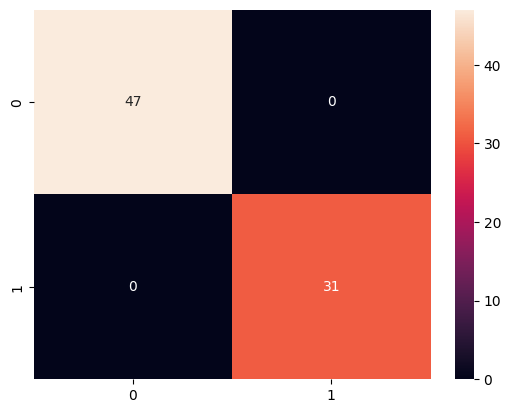

In [431]:
sns.heatmap(cm, annot=True);

# 06 - RANDOM FOREST

In [432]:
from sklearn.ensemble import RandomForestClassifier

In [433]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [434]:
y_pred = forest.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1])

In [435]:
accuracy_score(y_test, y_pred)

1.0

# 07 Redes neurais

In [436]:
import tensorflow as tf

In [437]:
X_train.shape

(233, 126)

In [443]:
(126 + 1) / 2

63.5

In [445]:
rede_neural = tf.keras.models.Sequential()
rede_neural.add(tf.keras.layers.Dense(units = 63, activation='relu', input_shape=(126,)))
rede_neural.add(tf.keras.layers.Dense(units = 63, activation = 'relu'))
rede_neural.add(tf.keras.layers.Dense(units = 63, activation = 'relu'))
rede_neural.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [446]:
rede_neural.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 63)                8001      
                                                                 
 dense_33 (Dense)            (None, 63)                4032      
                                                                 
 dense_34 (Dense)            (None, 63)                4032      
                                                                 
 dense_35 (Dense)            (None, 1)                 64        
                                                                 
Total params: 16,129
Trainable params: 16,129
Non-trainable params: 0
_________________________________________________________________


In [447]:
rede_neural.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [448]:
rede_neural.fit(X_train, y_train, epochs=200)

Epoch 1/200
8/8 [==============================] - 2s 9ms/step - loss: 0.6791 - accuracy: 0.5751
Epoch 2/200
8/8 [==============================] - 0s 4ms/step - loss: 0.5796 - accuracy: 0.6867
Epoch 3/200
8/8 [==============================] - 0s 19ms/step - loss: 0.5034 - accuracy: 0.6953
Epoch 4/200
8/8 [==============================] - 0s 6ms/step - loss: 0.3974 - accuracy: 0.8155
Epoch 5/200
8/8 [==============================] - 0s 18ms/step - loss: 0.2930 - accuracy: 0.9657
Epoch 6/200
8/8 [==============================] - 0s 12ms/step - loss: 0.1772 - accuracy: 0.9828
Epoch 7/200
8/8 [==============================] - 0s 6ms/step - loss: 0.0897 - accuracy: 0.9914
Epoch 8/200
8/8 [==============================] - 0s 4ms/step - loss: 0.0417 - accuracy: 1.0000
Epoch 9/200
8/8 [==============================] - 0s 4ms/step - loss: 0.0180 - accuracy: 1.0000
Epoch 10/200
8/8 [==============================] - 0s 18ms/step - loss: 0.0091 - accuracy: 1.0000
Epoch 11/200
8/8 [=======

In [449]:
y_pred = rede_neural.predict(X_test)
y_pred

3/3 [==============================] - 1s 24ms/step


array([[1.7856618e-06],
       [9.9998474e-01],
       [2.9097902e-07],
       [4.7843963e-07],
       [9.9998248e-01],
       [1.9924812e-07],
       [1.2309208e-04],
       [9.9999964e-01],
       [9.9985874e-01],
       [9.9999815e-01],
       [1.3382302e-06],
       [6.4110580e-08],
       [9.9997085e-01],
       [9.9996144e-01],
       [1.4638073e-07],
       [3.7393879e-06],
       [9.9999660e-01],
       [9.9999964e-01],
       [9.9999171e-01],
       [9.2822665e-07],
       [2.3734184e-07],
       [2.4496208e-07],
       [9.9992794e-01],
       [4.8073844e-06],
       [2.4957974e-06],
       [4.5133373e-07],
       [4.0621725e-08],
       [9.9999404e-01],
       [1.3645241e-06],
       [2.7589131e-05],
       [9.9999046e-01],
       [9.9999553e-01],
       [1.5978327e-07],
       [8.9727411e-07],
       [9.9999785e-01],
       [9.9999148e-01],
       [9.9996471e-01],
       [7.5391875e-07],
       [9.9594742e-01],
       [9.9998957e-01],
       [9.9999923e-01],
       [5.700515

# 08 - SALVAR O CLASSIFICADOR

In [450]:
import pickle

In [451]:
with open('variaveis_modelo.pkl', 'wb') as f:
  pickle.dump([scaler, onehotencoder, logistic], f)

In [452]:
with open('variaveis_modelo.pkl', 'rb') as f:
  min_max, encoder, model = pickle.load(f)

In [453]:
min_max, encoder, model

(MinMaxScaler(), OneHotEncoder(), LogisticRegression())

In [456]:
X_novo = dataset.iloc[0:1]
X_novo['DEMITIDO']

0    0
Name: DEMITIDO, dtype: int64

In [461]:
X_cat_novo = X_novo[['NAME_POSICAO', 'ESTADO_RESIDE', 'RACA', 'SITUACAO_PROFISSIONAL', 'DEPARTAMENTO', 'FONTE_RECRUTAMENTO', 'PONTUACAO_PERFORMACE',
       'HISPANICO/LATINO', 'SEXO', 'GERENTE_PESSOA']]
X_cat_novo

,NAME_POSICAO,ESTADO_RESIDE,RACA,SITUACAO_PROFISSIONAL,DEPARTAMENTO,FONTE_RECRUTAMENTO,PONTUACAO_PERFORMACE,HISPANICO/LATINO,SEXO,GERENTE_PESSOA
0,Production Technician I,MA,White,Active,Production,LinkedIn,Exceeds,No,M,Michael Albert


In [462]:
X_cat_novo = encoder.transform(X_cat_novo).toarray()
X_cat_novo

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0.]])

In [463]:
X_cat_novo = pd.DataFrame(X_cat_novo)
X_cat_novo

,0,1,2,3,4,5,6,7,8,9,...,105,106,107,108,109,110,111,112,113,114
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [464]:
X_numerical_novo = X_novo[['CASADO', 'ESTADO_CIVIL'
       , 'DIVERSIDADE', 'SALARIO', 'POSICAO',
       'DATA_NASCIMENTO',  'PONTUACAO_SATISFACAO','ENGAJAMENTO',
       'N_PROJETOS', 'N_ATRASOS', 'N_AUSENTE']]
X_numerical_novo

,CASADO,ESTADO_CIVIL,DIVERSIDADE,SALARIO,POSICAO,DATA_NASCIMENTO,PONTUACAO_SATISFACAO,ENGAJAMENTO,N_PROJETOS,N_ATRASOS,N_AUSENTE
0,0,0,0,62506,19,40,5,4.6,0,0,1


In [465]:
X_all_novo = pd.concat([X_cat_novo, X_numerical_novo], axis = 1)
X_all_novo

,0,1,2,3,4,5,6,7,8,9,...,ESTADO_CIVIL,DIVERSIDADE,SALARIO,POSICAO,DATA_NASCIMENTO,PONTUACAO_SATISFACAO,ENGAJAMENTO,N_PROJETOS,N_ATRASOS,N_AUSENTE
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,62506,19,40,5,4.6,0,0,1


In [466]:
X_novo = min_max.transform(X_all_novo)
X_novo

/home/max/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.  

In [467]:
model.predict(X_novo)

array([0])

In [468]:
model.predict_proba(X_novo)

array([[0.97703592, 0.02296408]])